<a href="https://colab.research.google.com/github/secondbonana/vision_catdog/blob/main/keras_catdog_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!cp /content/drive/MyDrive/deeplearning/dogs-vs-cats.zip .

In [4]:
!unzip -q dogs-vs-cats.zip -d catdog

In [5]:
!cd catdog; unzip -q test1.zip; unzip -q train.zip

In [6]:
!cd catdog/train; mkdir dogs; mkdir cats
!cd catdog/train; ls | grep -e cat | xargs mv -t cats
!cd catdog/train; ls | grep -e dog | xargs mv -t dogs

mv: cannot move 'cats' to a subdirectory of itself, 'cats/cats'
mv: cannot move 'dogs' to a subdirectory of itself, 'dogs/dogs'


In [7]:
!cd catdog/test1; mkdir dogs; mkdir cats
!cd catdog/test1; ls | grep -e cat | xargs mv -t cats
!cd catdog/test1; ls | grep -e dog | xargs mv -t dogs

mv: cannot move 'cats' to a subdirectory of itself, 'cats/cats'
mv: cannot move 'dogs' to a subdirectory of itself, 'dogs/dogs'


##data preprocessing

In [19]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale=1./255, validation_split = 0.2)

train_gen = generator.flow_from_directory(directory='catdog/train', 
                                          target_size=(150, 150),
                                          batch_size=100,
                                          class_mode='binary',
                                          shuffle=True,
                                          subset='training')

val_gen = generator.flow_from_directory(directory='catdog/train',
                                        target_size=(150,150),
                                        batch_size=100,
                                        class_mode='binary',
                                        shuffle=False,
                                        subset='validation')
# train_gen = generator.flow_from_directory('catdog/train', target_size=(150, 150),
#                                           batch_size=100,
#                                           class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


##Visualizing images

In [20]:
x_batch, y_batch = next(train_gen)

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

for i in range(len(x_batch)):
  plt.imshow(x_batch[i])
  plt.title(y_batch[i])
  plt.show()

##Build Model

In [31]:
from keras.layers import *
from keras.models import Model

def build_model():
  x = Input(shape=(150, 150, 3))
  out = x
  out = Conv2D(32, (3,3), activation='relu', padding='same')(out)
  out = MaxPooling2D(pool_size=(2,2))(out)

  out = Conv2D(64, (3,3), activation='relu', padding='same')(out)
  out = MaxPooling2D(pool_size=(2,2))(out)

  out = Conv2D(128, (3,3), activation='relu', padding='same')(out)
  out = MaxPooling2D(pool_size=(2,2))(out)

  out = Conv2D(256, (3,3), activation='relu', padding='same')(out)
  out = MaxPooling2D(pool_size=(2,2))(out)

  out = Flatten()(out)
  out = Dense(512, activation='relu')(out)
  out = Dense(1, activation='sigmoid')(out)
 
  model = Model(x, out)
  return model


SGD optimizer

In [35]:
model = build_model()
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_28 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 37, 37, 128)       7385

In [36]:
import numpy as np

hisotry = model.fit(
    train_gen,
    steps_per_epoch=int(np.ceil(20000 / float(100))),
    epochs=10,
    validation_data=val_gen,
    validation_steps=int(np.ceil(5000 / float(100)))
)

Epoch 1/10
200/200 [==============================] - 80s 394ms/step - loss: 0.6895 - binary_accuracy: 0.5323 - val_loss: 0.6853 - val_binary_accuracy: 0.5704
Epoch 2/10
200/200 [==============================] - 77s 385ms/step - loss: 0.6813 - binary_accuracy: 0.5864 - val_loss: 0.6778 - val_binary_accuracy: 0.5782
Epoch 3/10
200/200 [==============================] - 80s 399ms/step - loss: 0.6699 - binary_accuracy: 0.6007 - val_loss: 0.6592 - val_binary_accuracy: 0.6244
Epoch 4/10
200/200 [==============================] - 77s 386ms/step - loss: 0.6596 - binary_accuracy: 0.6054 - val_loss: 0.6482 - val_binary_accuracy: 0.6298
Epoch 5/10
200/200 [==============================] - 80s 401ms/step - loss: 0.6512 - binary_accuracy: 0.6136 - val_loss: 0.6568 - val_binary_accuracy: 0.5960
Epoch 6/10
200/200 [==============================] - 81s 404ms/step - loss: 0.6440 - binary_accuracy: 0.6226 - val_loss: 0.6434 - val_binary_accuracy: 0.6220
Epoch 7/10
200/200 [==========================

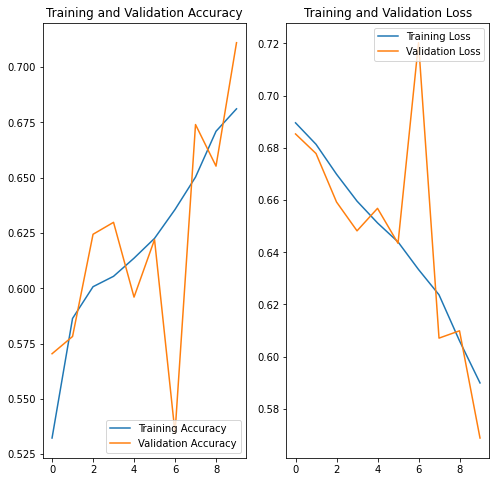

In [42]:
loss = hisotry.history['loss']
val_loss = hisotry.history['val_loss']

acc = hisotry.history['binary_accuracy']
val = hisotry.history['val_binary_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

Adam optimizer

In [43]:
model = build_model()
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['binary_accuracy'])
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_32 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 37, 37, 128)       7385

In [44]:
import numpy as np

hisotry = model.fit(
    train_gen,
    steps_per_epoch=int(np.ceil(20000 / float(100))),
    epochs=10,
    validation_data=val_gen,
    validation_steps=int(np.ceil(5000 / float(100)))
)

Epoch 1/10
200/200 [==============================] - 83s 407ms/step - loss: 0.6473 - binary_accuracy: 0.6136 - val_loss: 0.5435 - val_binary_accuracy: 0.7216
Epoch 2/10
200/200 [==============================] - 78s 390ms/step - loss: 0.5254 - binary_accuracy: 0.7362 - val_loss: 0.4706 - val_binary_accuracy: 0.7732
Epoch 3/10
200/200 [==============================] - 86s 431ms/step - loss: 0.4375 - binary_accuracy: 0.7972 - val_loss: 0.4126 - val_binary_accuracy: 0.8118
Epoch 4/10
200/200 [==============================] - 79s 395ms/step - loss: 0.3691 - binary_accuracy: 0.8339 - val_loss: 0.3624 - val_binary_accuracy: 0.8420
Epoch 5/10
200/200 [==============================] - 77s 383ms/step - loss: 0.3132 - binary_accuracy: 0.8637 - val_loss: 0.4002 - val_binary_accuracy: 0.8120
Epoch 6/10
200/200 [==============================] - 86s 430ms/step - loss: 0.2649 - binary_accuracy: 0.8870 - val_loss: 0.2903 - val_binary_accuracy: 0.8762
Epoch 7/10
200/200 [==========================

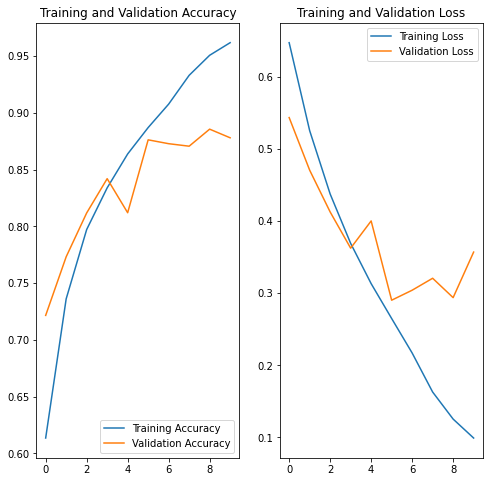

In [45]:
loss = hisotry.history['loss']
val_loss = hisotry.history['val_loss']

acc = hisotry.history['binary_accuracy']
val = hisotry.history['val_binary_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()